In [1]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob, re, json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math, json
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 100)

result_dir = os.path.join(os.getenv("CENSAI_PATH"), "results")
data_path = os.path.join(os.getenv("CENSAI_PATH"), "data")
models_path = os.path.join(os.getenv("CENSAI_PATH"), "models")

In [2]:
hparams = pd.read_csv(os.path.join(result_dir, "RT128_512_grid4.csv"), index_col=0)
histories = {}
for file in hparams["experiment_id"]:
    histories.update({file: pd.read_csv(os.path.join(result_dir, file + ".csv"), index_col=0).to_dict()})
hparams[["filters", "filter_scaling", "kernel_size", "block_conv_layers", "initial_learning_rate", "decay_steps", "decay_rate", "train_cost", "train_lens_residuals", "experiment_id"]].sort_values(by="train_cost")

,filters,filter_scaling,kernel_size,block_conv_layers,initial_learning_rate,decay_steps,decay_rate,train_cost,train_lens_residuals,experiment_id
9,16,2.0,3,2,0.000100,50000,0.5,0.072598,0.002466,RT128_512_grid4_010_FS2.0_K3_F16_42_lr0.0001_ds50000_211006132142
27,64,1.0,3,2,0.000100,50000,0.5,0.072817,0.002664,RT128_512_grid4_028_FS1.0_K3_F64_10_lr0.0001_ds50000_211006141708
22,128,1.0,5,2,0.000010,50000,0.5,0.073557,0.003154,RT128_512_grid4_023_FS1.0_K5_F128_12_lr1e-05_ds50000_211006134340
7,128,1.0,5,2,0.000010,50000,0.5,0.074909,0.003752,RT128_512_grid4_008_FS1.0_K5_F128_42_lr1e-05_ds50000_211006131109
3,32,2.0,5,2,0.000010,50000,0.5,0.075396,0.002345,RT128_512_grid4_004_FS2.0_K5_F32_12_lr1e-05_ds50000_211006130056
5,16,2.0,5,2,0.000100,10000,0.5,0.075559,0.003803,RT128_512_grid4_006_FS2.0_K5_F16_10_lr0.0001_ds10000_211006132327
2,84,1.0,5,2,0.000100,10000,0.5,0.075779,0.002210,RT128_512_grid4_003_FS1.0_F84_10_211006102809
23,84,1.0,5,2,0.000100,10000,0.5,0.075805,0.002229,RT128_512_grid4_024_FS1.0_F84_42_211006104116
4,64,1.0,5,2,0.000100,10000,0.5,0.075806,0.002170,RT128_512_grid4_005_FS1.0_F64_10_211006102825
25,64,1.0,5,2,0.000010,50000,0.5,0.076037,0.002890,RT128_512_grid4_026_FS1.0_K5_F64_10_lr1e-05_ds50000_211006140835


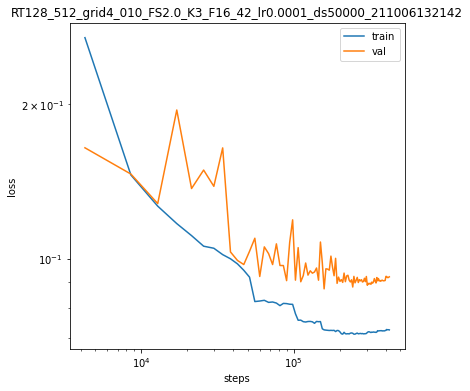

In [16]:
title = "RT128_512_grid4_010_FS2.0_K3_F16_42_lr0.0001_ds50000_211006132142"
steps = histories[title]["step"].values()
train_loss = histories[title]["train_cost"].values()
val_loss = histories[title]["val_cost"].values()

plt.figure(figsize=(6, 6))
plt.plot(steps, train_loss, label="train")
plt.plot(steps, val_loss, label="val")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("steps")
plt.title(title)
plt.legend()


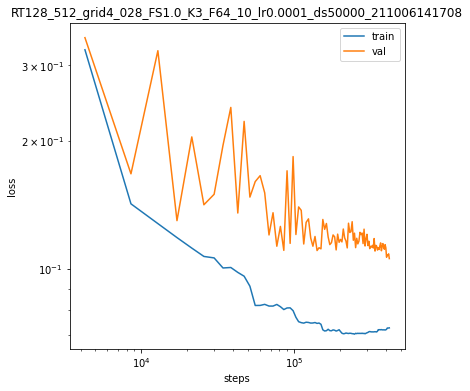

In [20]:
title = "RT128_512_grid4_028_FS1.0_K3_F64_10_lr0.0001_ds50000_211006141708"
steps = histories[title]["step"].values()
train_loss = histories[title]["train_cost"].values()
val_loss = histories[title]["val_cost"].values()

plt.figure(figsize=(6, 6))
plt.plot(steps, train_loss, label="train")
plt.plot(steps, val_loss, label="val")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("loss")
plt.xlabel("steps")
plt.title(title)
plt.legend();


In [23]:
import tensorflow as tf
from censai import RayTracer, PhysicalModel
from censai.data.alpha_tng import decode_train, decode_physical_info
from censai.utils import nullwriter, plot_to_image, raytracer_residual_plot as residual_plot
from argparse import Namespace

In [30]:
checkpoints_dir = os.path.join(os.getenv("CENSAI_PATH"), "models", "RT128_512_grid4_010_FS2.0_K3_F16_42_lr0.0001_ds50000_211006132142")
with open(os.path.join(checkpoints_dir, "script_params.json"), "r") as f:
    args = json.load(f)
args = Namespace(**args)

tf.random.set_seed(args.seed)
np.random.seed(args.seed)
files = []
for dataset in [os.path.join(os.getenv('CENSAI_PATH'), "data", "alpha128_512_hTNG_15k")]:
    files.extend(glob.glob(os.path.join(dataset, "*.tfrecords")))
np.random.shuffle(files)
# Readconcurrently from multiple records
files = tf.data.Dataset.from_tensor_slices(files)
dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type=args.compression_type),
                           block_length=args.block_length, num_parallel_calls=tf.data.AUTOTUNE)
# extract physical info from first example
for image_fov, kappa_fov in dataset.map(decode_physical_info):
    break
dataset = dataset.map(decode_train)
dataset = dataset.shuffle(1000, True).batch(1)

In [39]:
ray_tracer = RayTracer(
    pixels=args.pixels,
    filter_scaling=args.filter_scaling,
    layers=args.layers,
    block_conv_layers=args.block_conv_layers,
    kernel_size=args.kernel_size,
    filters=args.filters,
    strides=args.strides,
    bottleneck_filters=args.bottleneck_filters,
    resampling_kernel_size=args.resampling_kernel_size,
    upsampling_interpolation=args.upsampling_interpolation,
    kernel_regularizer_amp=args.kernel_regularizer_amp,
    activation=args.activation,
    initializer=args.initializer,
    kappalog=args.kappalog,
    normalize=args.normalize,
)

ckpt = tf.train.Checkpoint(net=ray_tracer)
checkpoint_manager = tf.train.CheckpointManager(ckpt, checkpoints_dir, max_to_keep=args.max_to_keep)
checkpoint_manager.checkpoint.restore(checkpoint_manager.latest_checkpoint).expect_partial()



In [41]:
vars(args)["source_w"] = 1
vars(args)["source_fov"] = 5
phys = PhysicalModel(pixels=args.pixels, image_fov=image_fov, kappa_fov=kappa_fov, src_fov=args.source_fov, psf_sigma=args.psf_sigma)

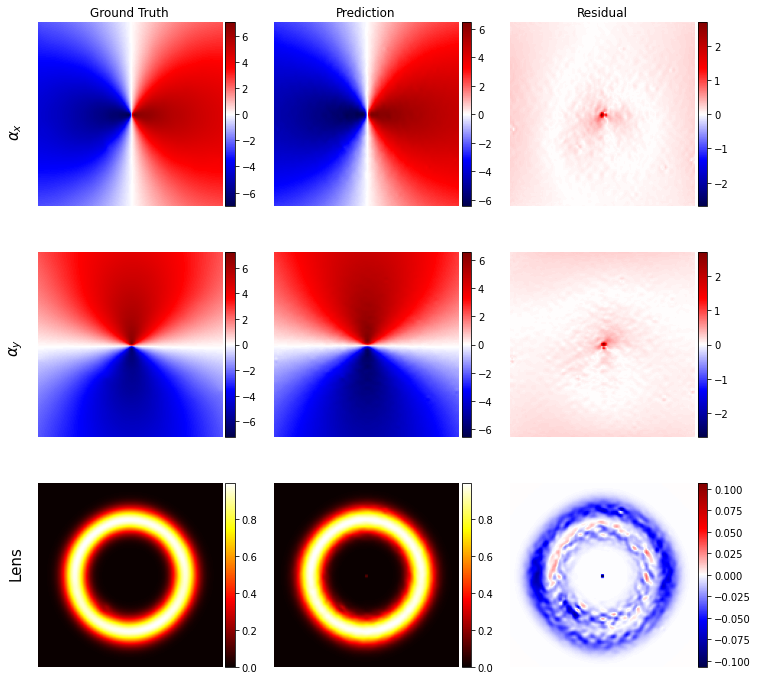

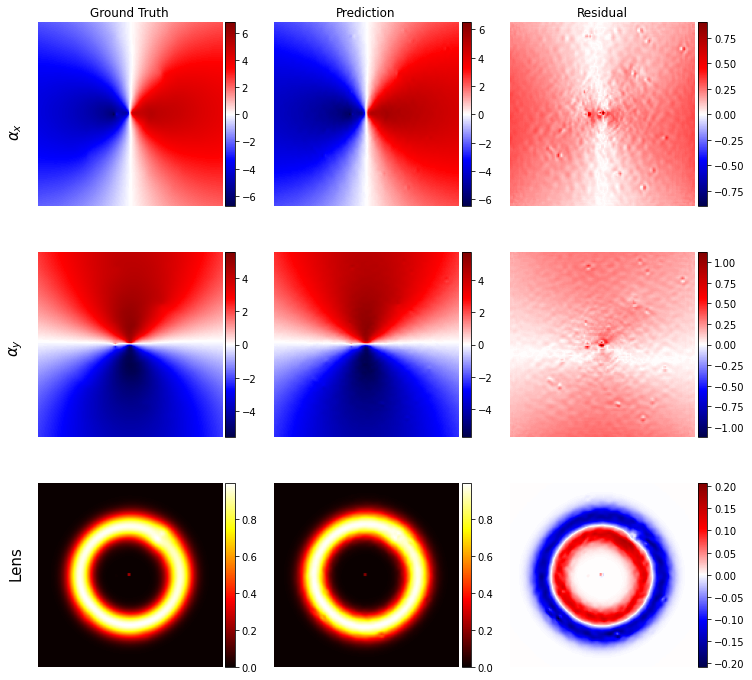

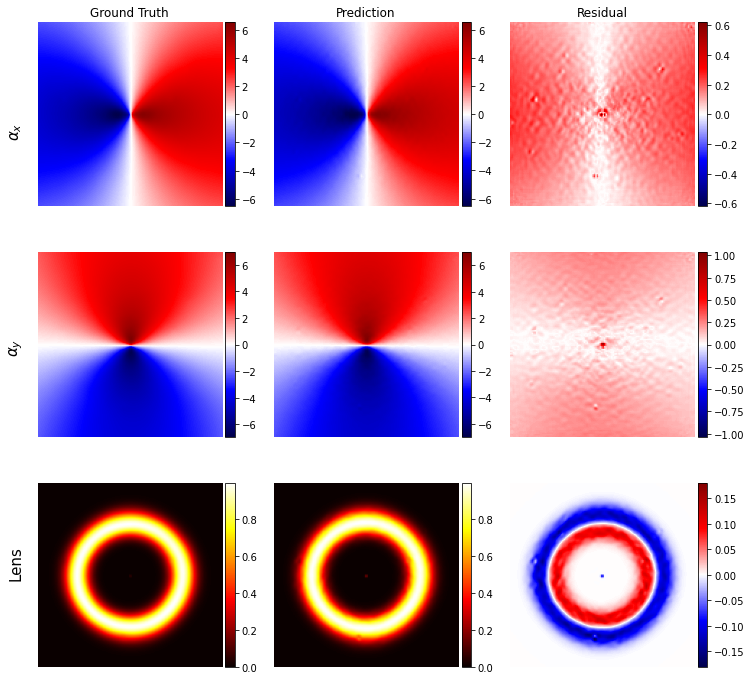

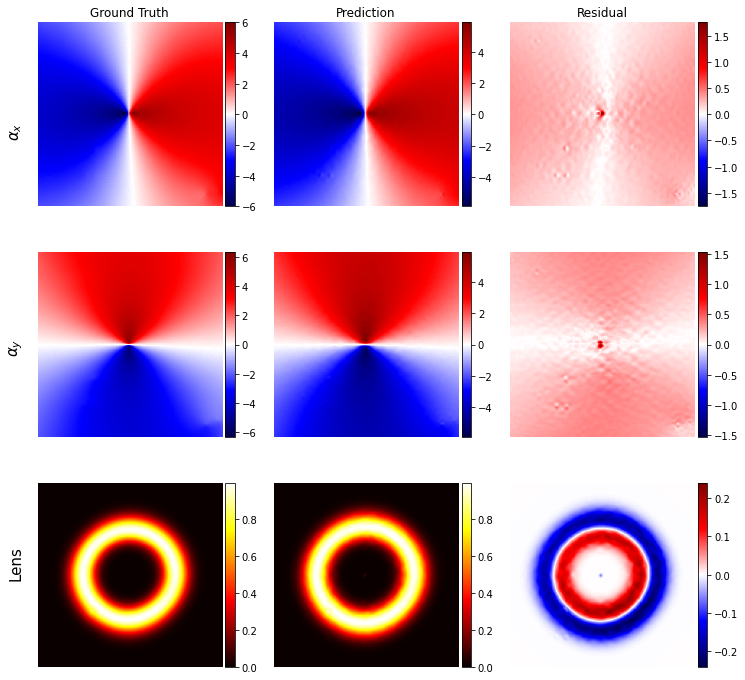

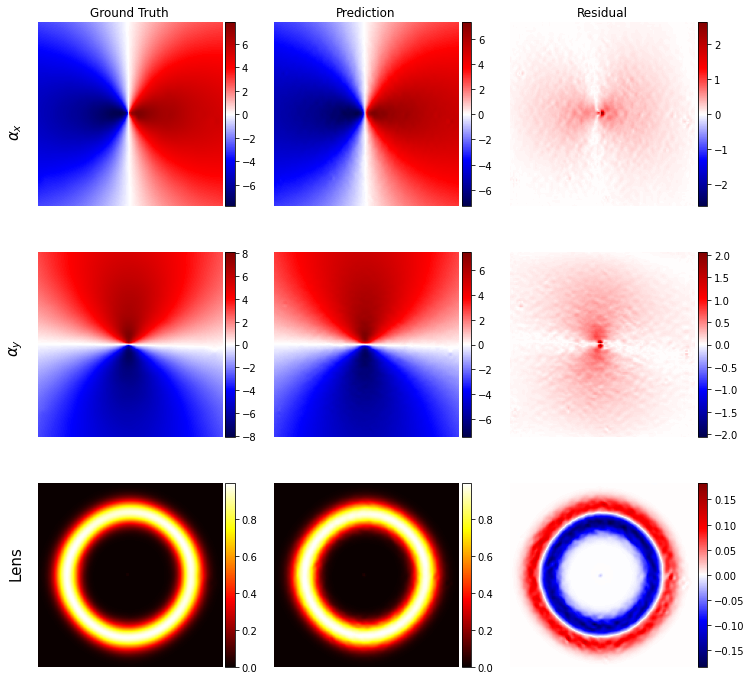

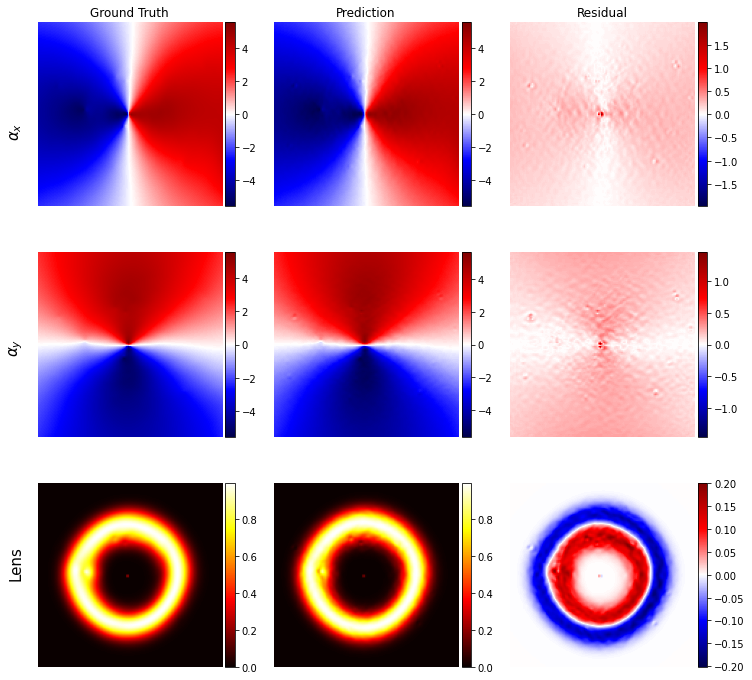

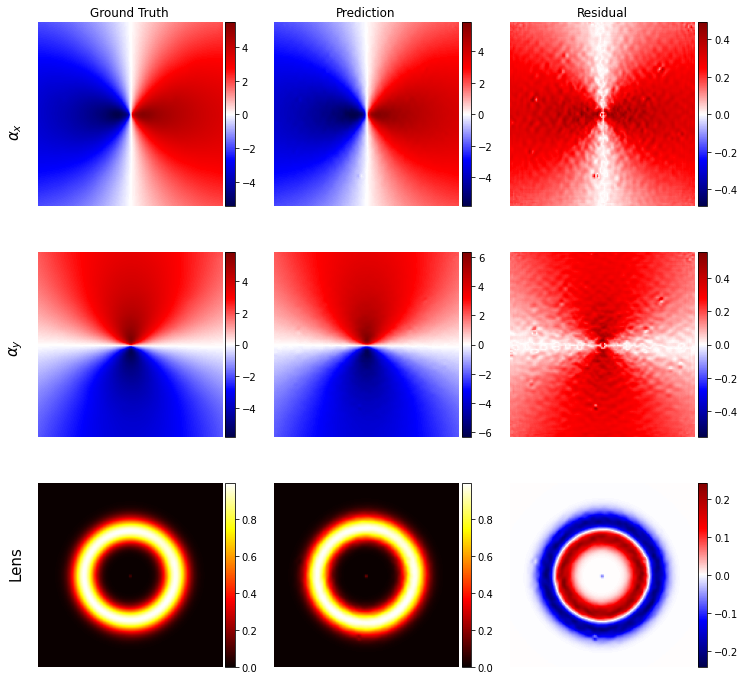

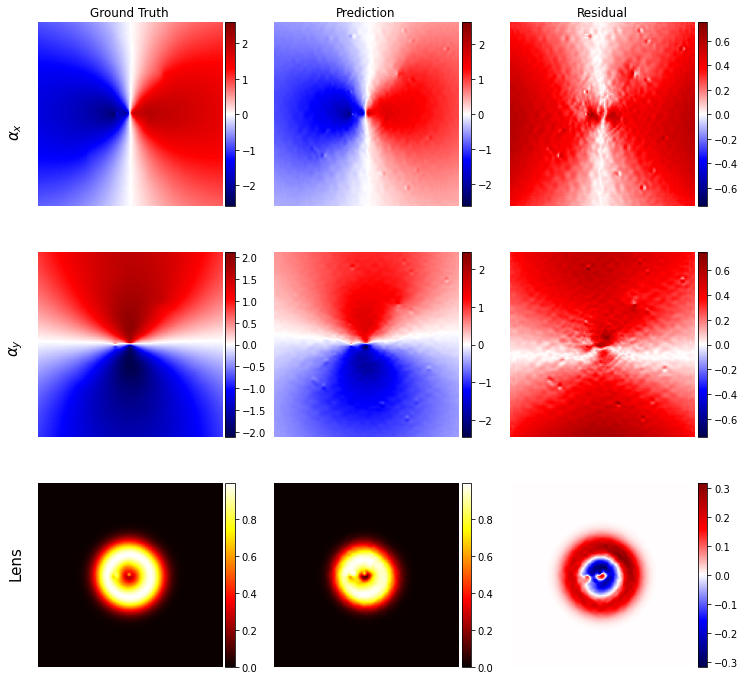

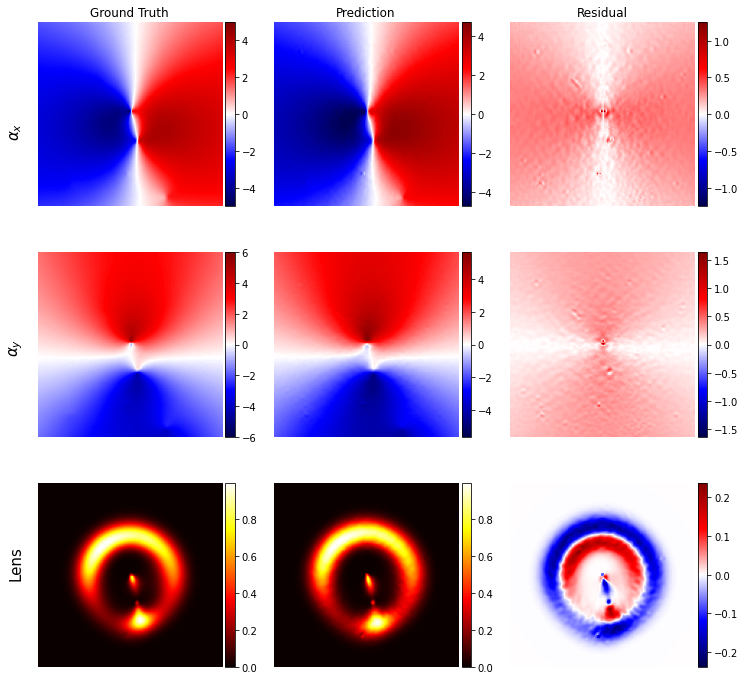

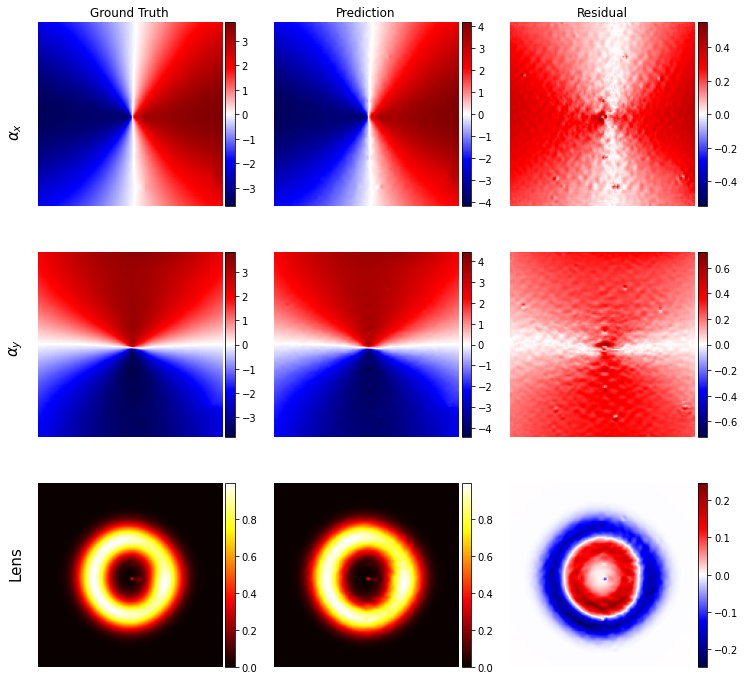

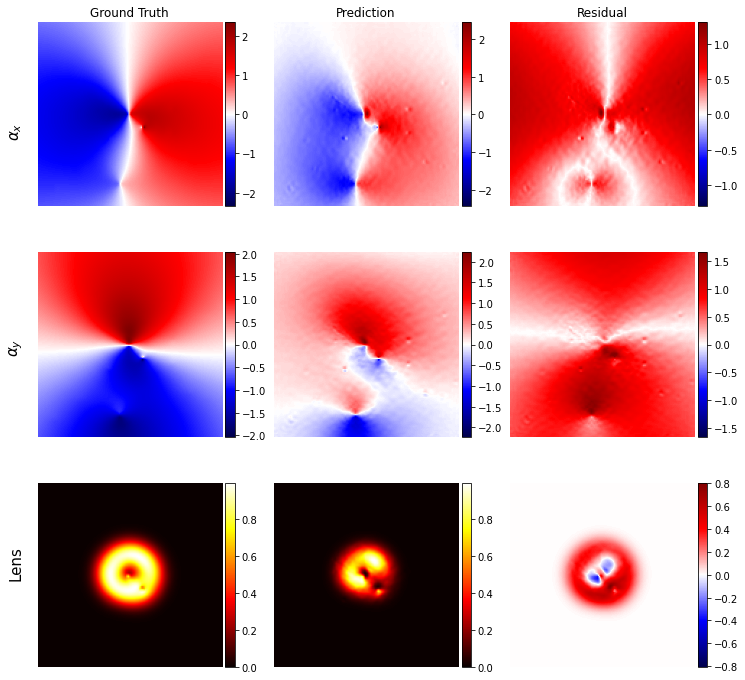

In [42]:
i = 0
for kappa_true, alpha_true in dataset:
    alpha_pred = ray_tracer.call(kappa_true)
    # Lens residual
    lens_true = phys.lens_source_func(kappa_true, w=args.source_w)
    lens_pred = phys.lens_source_func_given_alpha(alpha_pred, w=args.source_w)
    train_chi_squared = tf.reduce_mean(tf.square(lens_true - lens_pred))
    residual_plot(alpha_true[0], alpha_pred[0], lens_true[0], lens_pred[0])
    if i == 10:
        break
    i += 1